# **Proyecto ML:** ***Riesgo de obesidad***

<p align="center">
  <img src="https://www-rockandpop-cl.cdn.ampproject.org/i/s/www.rockandpop.cl/wp-content/uploads/2019/10/obesidad-y-sobrepeso-como-prevenir.jpg" alt="Texto alternativo" width="600" height="300">
</p>

### **1.Introducción**

### **2.Librerías**

In [52]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, cross_val_predict
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier



from sklearn.metrics import balanced_accuracy_score, make_scorer,classification_report
pd.set_option('display.max.column',None)

### **3.Carga de datos**

In [53]:
df=pd.read_csv('../data/raw/train.csv')

### **4.Primera exploración**

**4.1.Primera visualización del DataFrame**

In [54]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [55]:
df.tail()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II
20757,20757,Male,26.680376,1.816547,118.134898,yes,yes,3.000000,3.000000,Sometimes,no,2.003563,no,0.684487,0.713823,Sometimes,Public_Transportation,Obesity_Type_II


**4.2.Estructura del DataFrame**

In [56]:
df.shape

(20758, 18)

**4.3.Clasificación de variables**

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

**4.4.Revisión de duplicados**

In [58]:
df.duplicated().sum()

0

**4.5.Revisión de valores faltantes**

In [59]:
df.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

**4.6.Resumen estadístico general del DataFrame**

In [60]:
df.describe(exclude='object').round(2)

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00,20758.00,20758.00,20758.00,20758.00,20758.00,20758.00,20758.00,20758.00
mean,10378.50,23.84,1.70,87.89,2.45,2.76,2.03,0.98,0.62
std,5992.46,5.69,0.09,26.38,0.53,0.71,0.61,0.84,0.60
min,0.00,14.00,1.45,39.00,1.00,1.00,1.00,0.00,0.00
25%,5189.25,20.00,1.63,66.00,2.00,3.00,1.79,0.01,0.00
50%,10378.50,22.82,1.70,84.06,2.39,3.00,2.00,1.00,0.57
75%,15567.75,26.00,1.76,111.60,3.00,3.00,2.55,1.59,1.00
max,20757.00,61.00,1.98,165.06,3.00,4.00,3.00,3.00,2.00


In [61]:
df.describe(include='object')

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,20758,20758,20758,20758,20758,20758,20758,20758,20758
unique,2,2,2,4,2,2,3,5,7
top,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
freq,10422,17014,18982,17529,20513,20071,15066,16687,4046


**4.7.Descripción general de los datos**

In [62]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


### **5.EDA**

In [63]:
df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

**5.1.Explicación de las variables**

**Target:**

Nobeyesdad: riesgo de obesidad

**Features:**

+ id: Id del individuo

+ Gender: género del individuo

+ Age: edad del individuo

+ Height: altura del individuo(m)

+ Weight: peso del individuo(kg)

+ family_history_with_overweight: Antecedentes familiares con sobrepeso(si/no)

+ FAVC: Consumo frecuente de alimentos ricos en calorías(si/no)
 
+ FCVC: Frecuencia de consumo de vegetales

+ NCP: Número de comidas principales

+ CAEC: Consumo de alimentos entre comidas

+ CH2O: Consumo de agua diario

+ CALC: Consumo de alcohol

+ SMOKE: fumador(si/no)

+ SCC: Monitoreo del consumo de calorías

+ FAF: Frecuencia de actividad física

+ TUE: Tiempo de uso de dispositivos tecnológicos

+ MTRANS: Transporte utilizado


In [64]:
#Pasamos los nombres de las columnas a minúscula
df.columns = df.columns.str.lower()

In [65]:
#Renombramos 'family_history_with_overweight'
df = df.rename(columns={'family_history_with_overweight': 'family'})

**5.1.Cardinalidad y tipo de variables**

Haremos un estudio sobre la cardinalidad, para observar el número de valores únicos de cada variable
y ver si encontramos algo significativo para nuestro estudio.

In [66]:
cardinalidad = pd.DataFrame({
    'Columna': df.columns,
    'Tipo_Variable':['Discreta' if x == 'int64' else 'Continua' if x=='float64' else 'Categórica' for x in df.dtypes],
    'Cardinalidad%':[round((df[col].nunique())/len(df)*100,2) for col in df.columns]})

condiciones = {
    'caec': 'Ordinal',
    'calc': 'Ordinal',
    'nobeyesdad': 'Ordinal',
    'mtrans': 'Nominal'
}
for condicion, tipo in condiciones.items():
    cardinalidad.loc[cardinalidad['Columna'] == condicion, 'Tipo_Variable'] = tipo

cardinalidad['Tipo_Variable'] = cardinalidad['Tipo_Variable'].replace('Categórica', 'Binaria')

cardinalidad

,Columna,Tipo_Variable,Cardinalidad%
0,id,Discreta,100.00
1,gender,Binaria,0.01
2,age,Continua,8.20
3,height,Continua,8.83
4,weight,Continua,9.53
5,family,Binaria,0.01
6,favc,Binaria,0.01
7,fcvc,Continua,4.50
8,ncp,Continua,3.32
9,caec,Ordinal,0.02


**5.2.Análisis univariante**

In [67]:
#Función para visualización

def grafico_histbox(column, df):
    # Crear figura y ejes de subplots
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Gráfico de distribución (histograma)
    sns.histplot(df[column], kde=True, ax=axs[0])
    axs[0].set_title(f'Distribución de la variable {column}')
    axs[0].set_xlabel(f'Valores de {column}')
    axs[0].set_ylabel('Frecuencia')

    # Gráfico de análisis univariante (boxplot)
    mean = df[column].mean()
    median = df[column].median()
    sns.boxplot(x=df[column], ax=axs[1])
    axs[1].axvline(mean, color='g', linestyle='-', label=f'Mean={mean:.1f}')
    axs[1].axvline(median, color='r', linestyle='-', label=f'Median={median:.1f}')
    axs[1].legend()
    axs[1].set_title(f'Análisis Univariante de {column}')
    axs[1].set_xlabel(column)

    plt.tight_layout()
    plt.show()

def grafico_countplot(column,df):

    custom_palette = sns.color_palette("husl", len(df[column].unique()))
    sns.countplot(x=column, hue=column, data=df, palette=custom_palette, stat='percent')

    return plt.show()



+ **Target: 'nobeyesdad'**

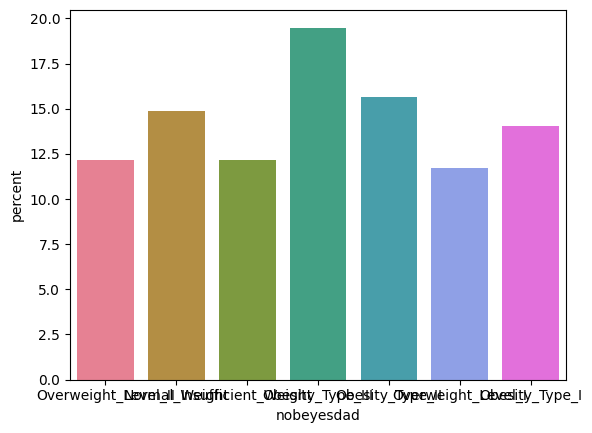

In [68]:
grafico_countplot('nobeyesdad',df)

In [69]:
df['nobeyesdad'].value_counts()

nobeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

+ **Variable 'age'**

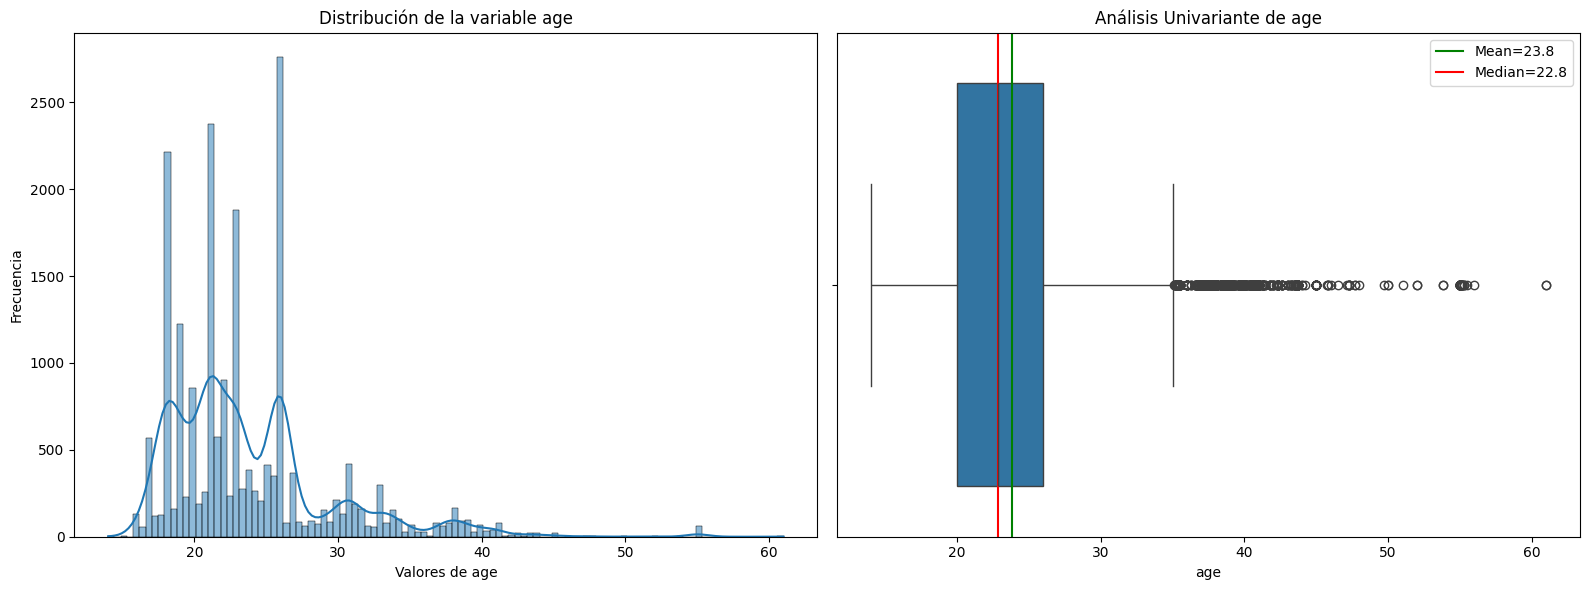

In [70]:
grafico_histbox('age',df)

+ **Variable 'height'**

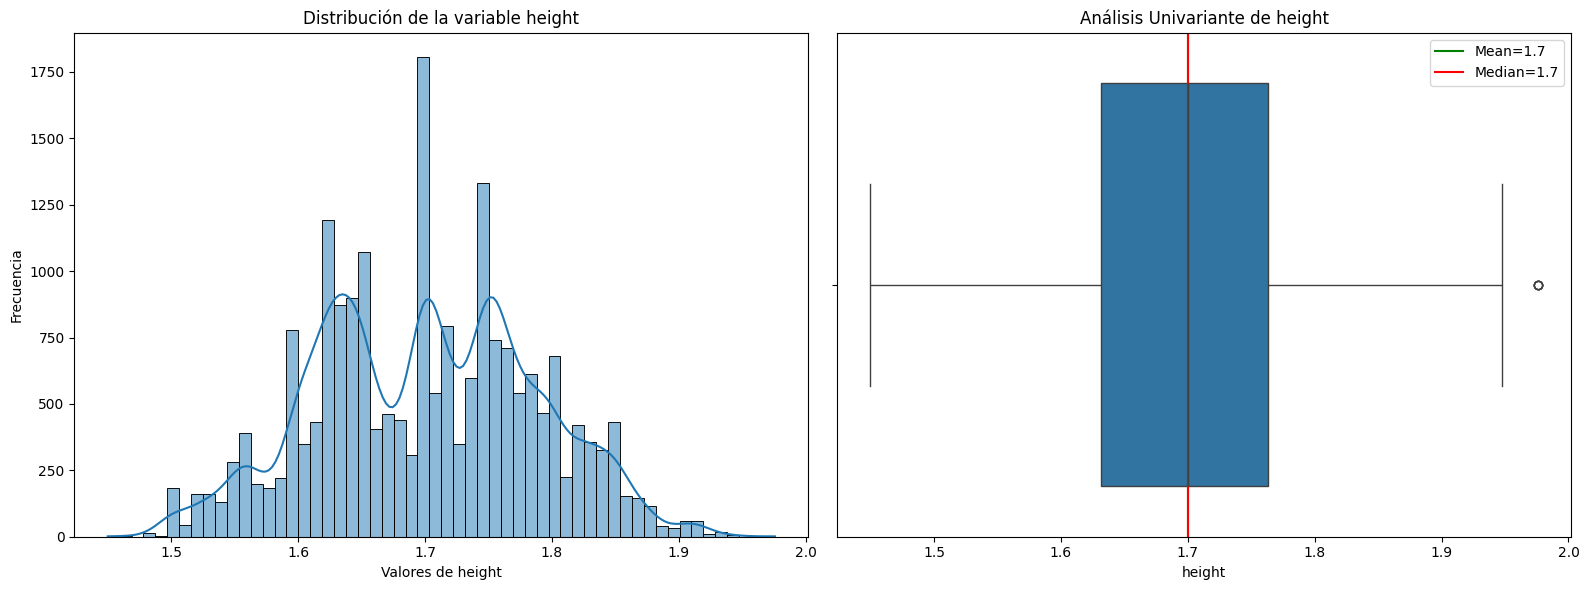

In [71]:
grafico_histbox('height',df)

+ **Variable 'weight'**

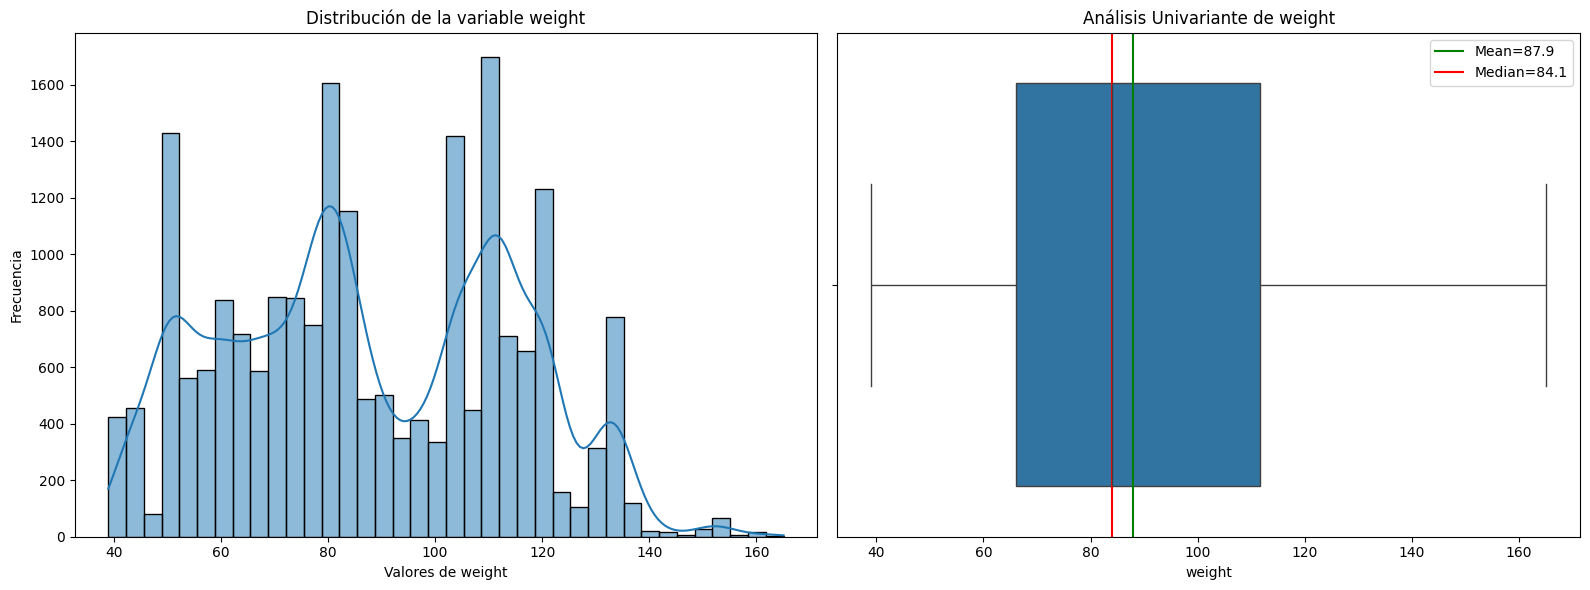

In [72]:
grafico_histbox('weight',df)

+ **Variable 'fcvc'**

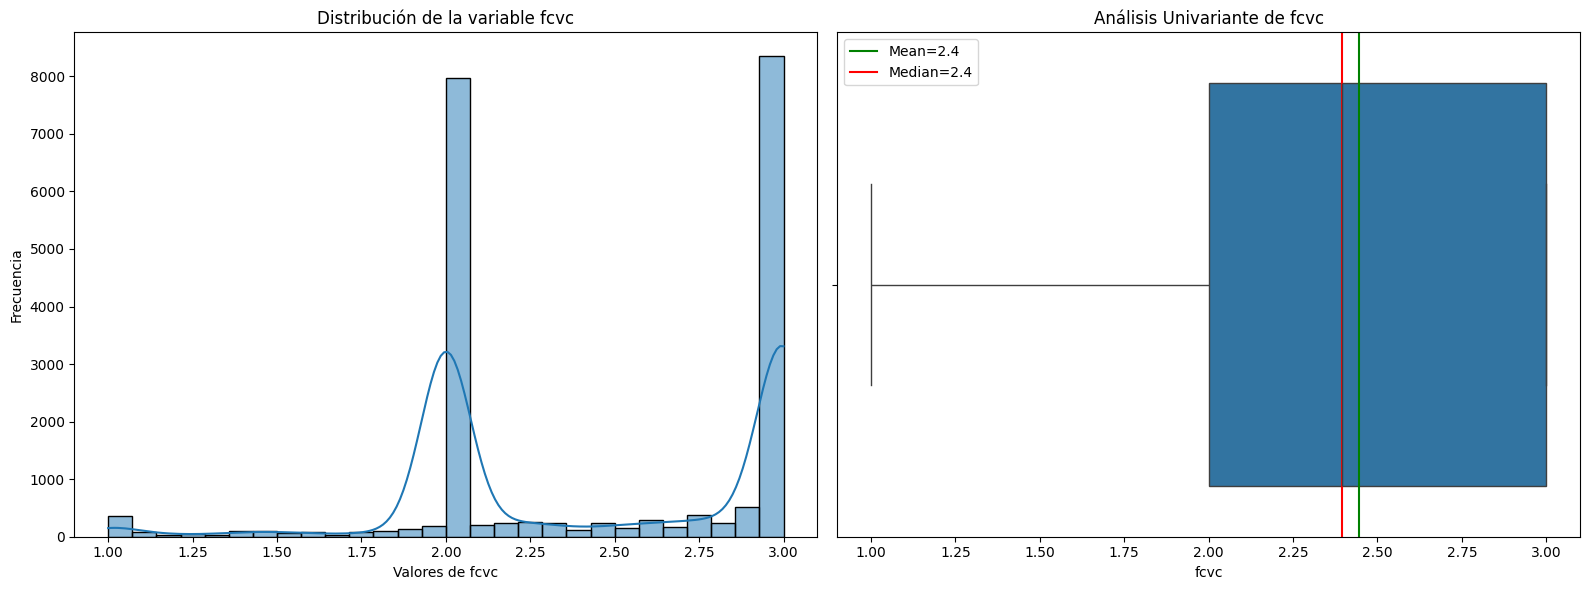

In [73]:
grafico_histbox('fcvc',df)

+ **Variable 'ncp'**

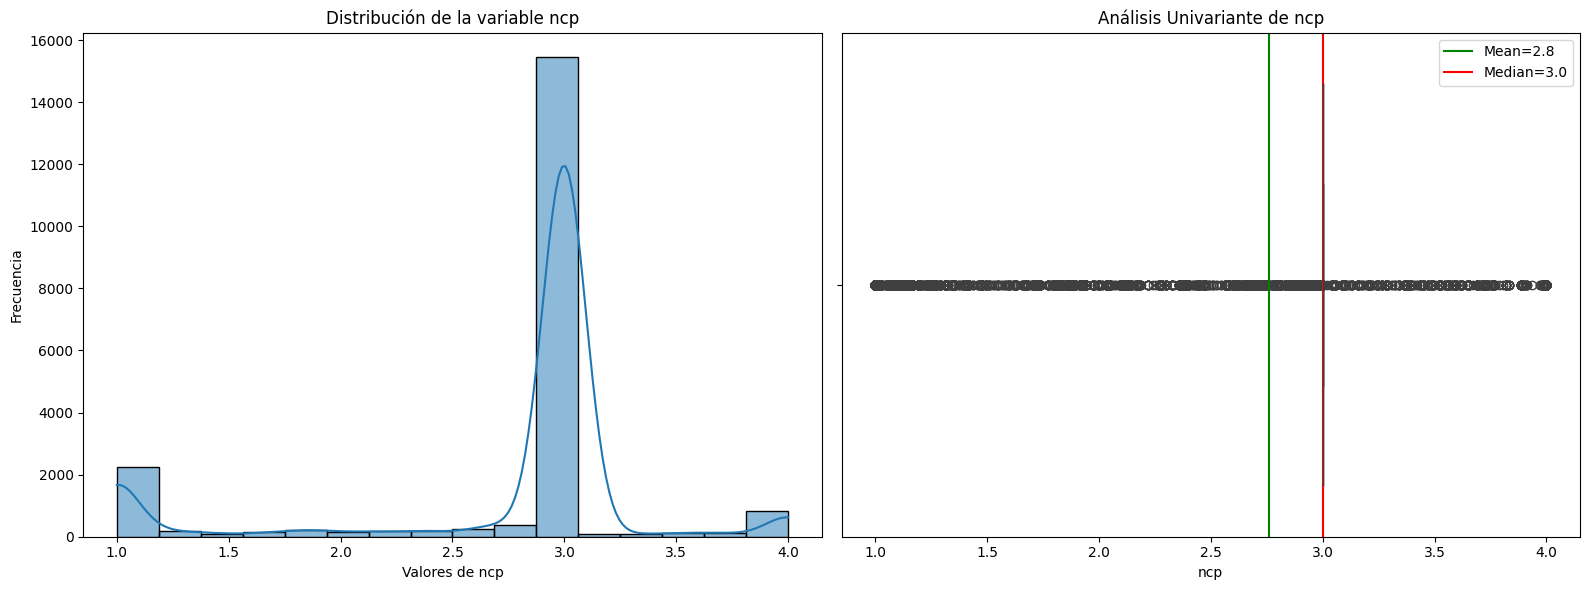

In [74]:
grafico_histbox('ncp',df)

+ **Variable 'ch2o'**

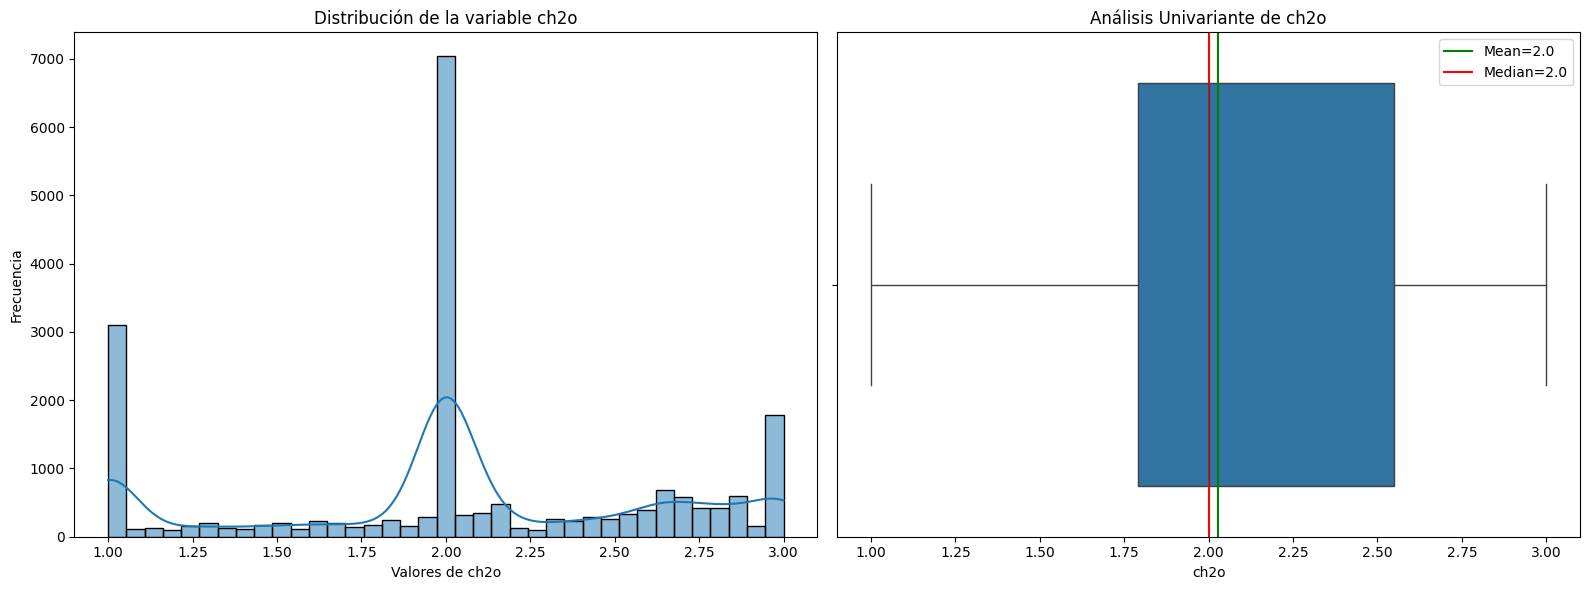

In [75]:
grafico_histbox('ch2o',df)

+ **Variable 'faf'**

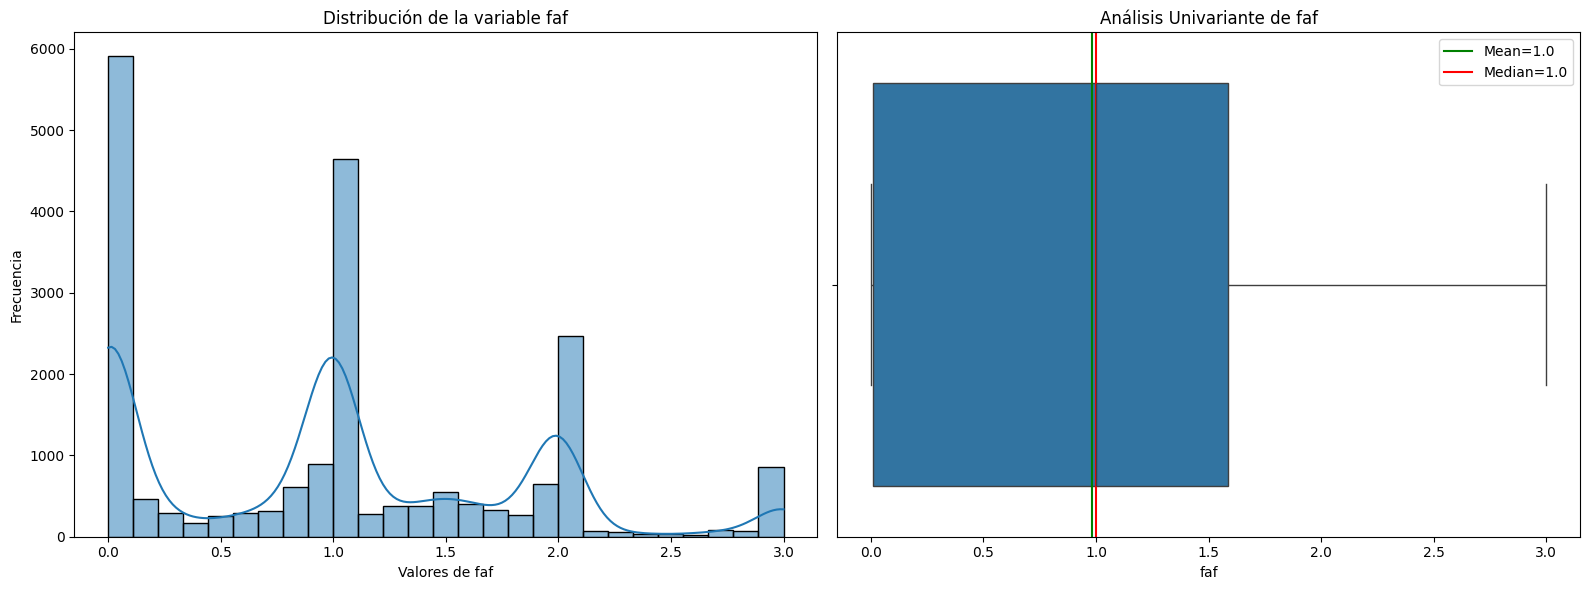

In [76]:
grafico_histbox('faf',df)

+ **Variable 'tue'**

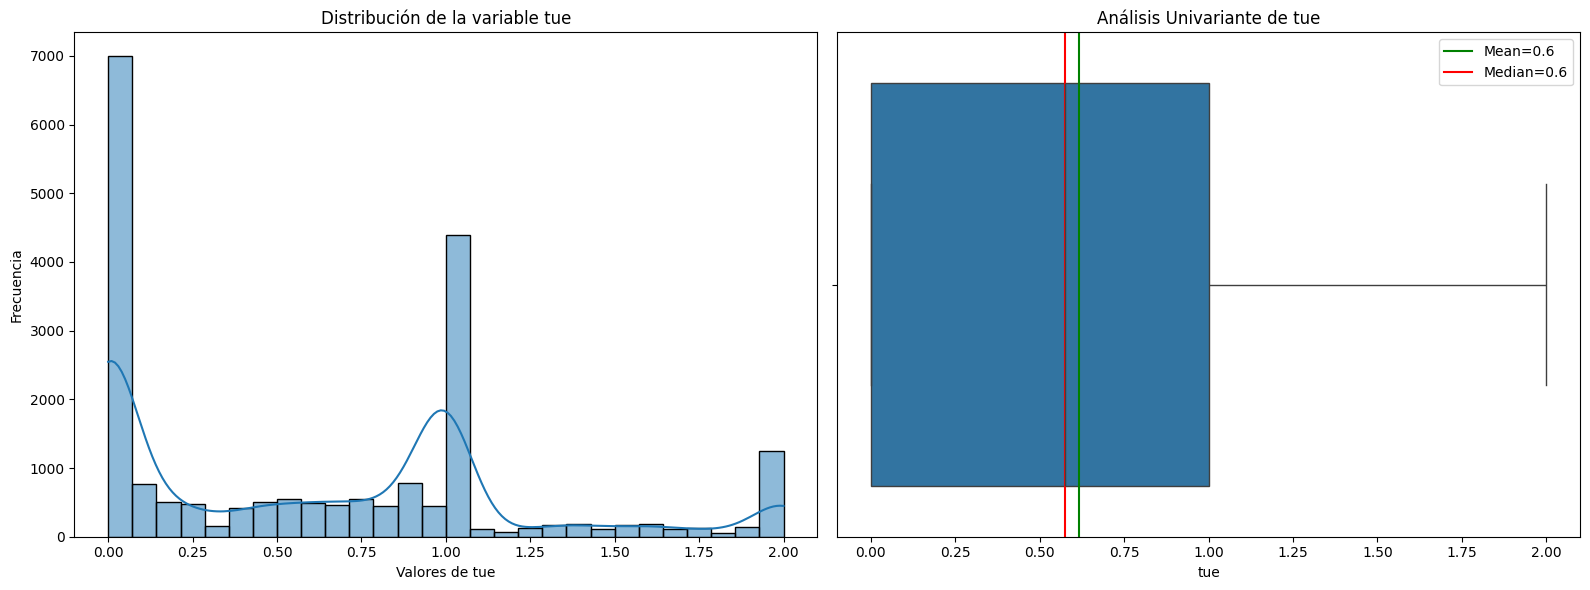

In [77]:
grafico_histbox('tue',df)

+ **Variable 'gender'**

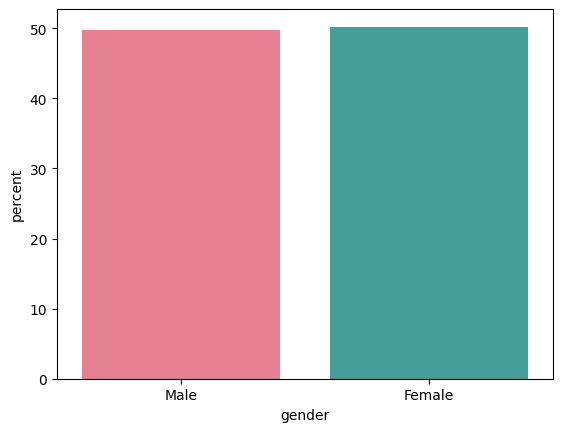

In [78]:
grafico_countplot('gender',df)

In [79]:
df['gender'].value_counts()

gender
Female    10422
Male      10336
Name: count, dtype: int64

+ **Variable 'family'**

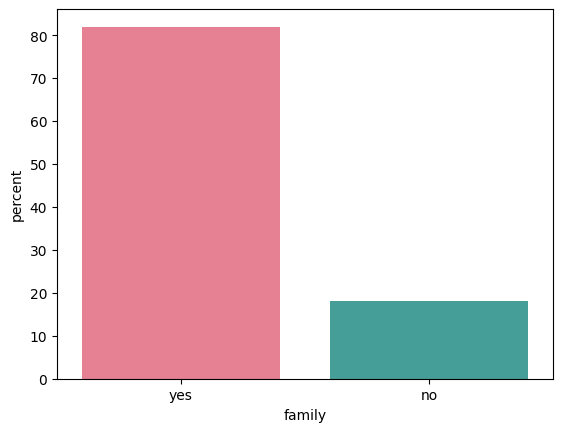

In [80]:
grafico_countplot('family',df)

In [81]:
df['family'].value_counts()

family
yes    17014
no      3744
Name: count, dtype: int64

+ **Variable 'favc'**

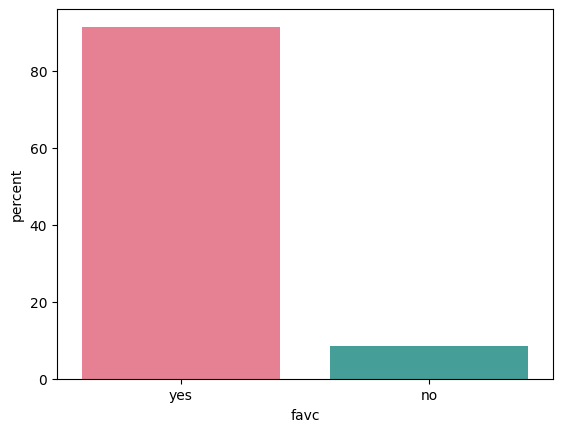

In [82]:
grafico_countplot('favc',df)

In [83]:
df['favc'].value_counts()

favc
yes    18982
no      1776
Name: count, dtype: int64

+ **Variable 'smoke'**

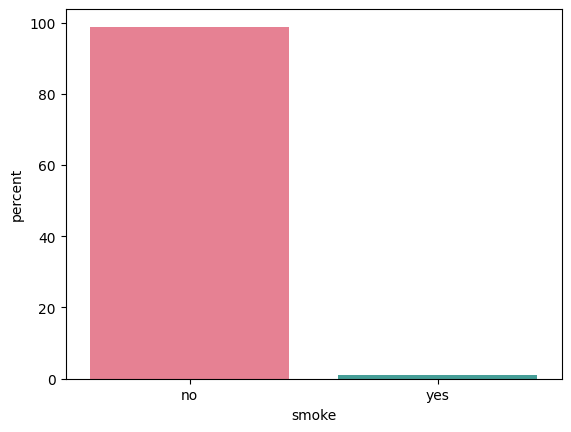

In [84]:
grafico_countplot('smoke',df)

In [85]:
df['smoke'].value_counts()

smoke
no     20513
yes      245
Name: count, dtype: int64

+ **Variable 'scc'**

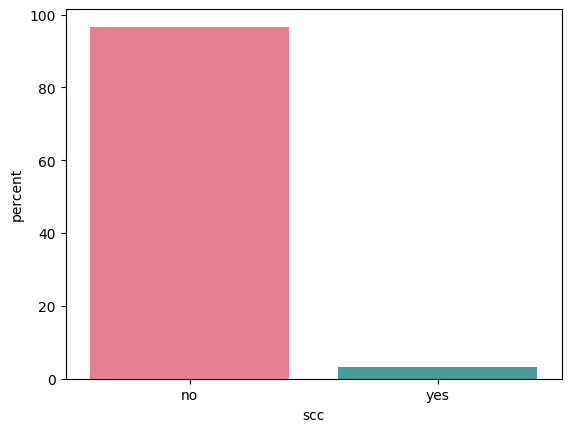

In [86]:
grafico_countplot('scc',df)

In [87]:
df['scc'].value_counts()

scc
no     20071
yes      687
Name: count, dtype: int64

+ **Variable 'caec'**

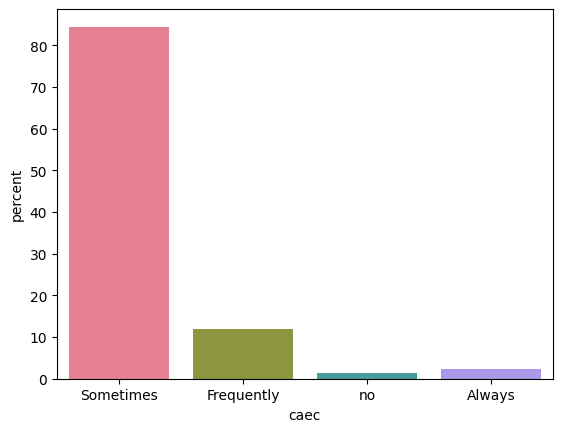

In [88]:
grafico_countplot('caec',df)

In [89]:
df['caec'].value_counts()

caec
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64

+ **Variable 'calc'**

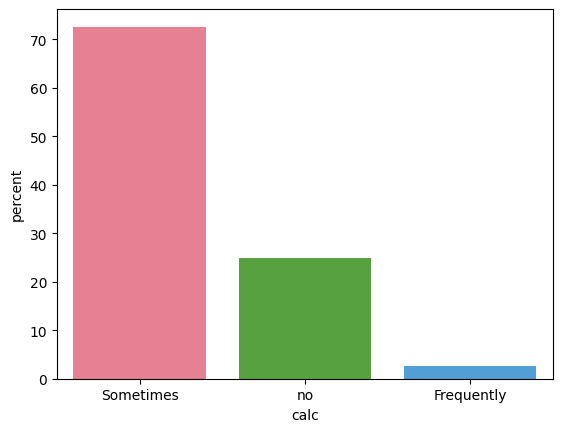

In [90]:
grafico_countplot('calc',df)

In [91]:
df['calc'].value_counts()

calc
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64

+ **Variable 'mtrans'**

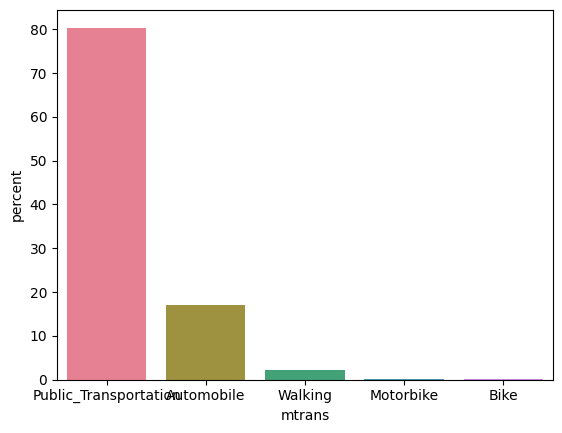

In [92]:
grafico_countplot('mtrans',df)

**5.3.Análisis bivariante**

In [93]:
df['mtrans'].value_counts()

mtrans
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64

**6.Feature Engineer**

**7.División del dataset**

In [94]:
#División dataset----> train y test
train_set, test_set= train_test_split(df, test_size=0.2, random_state=42)

#División train_set---> train y validation
train, val = train_test_split(train_set, test_size=0.2, random_state=42)

# Separar características y etiquetas para conjunto de entrenamiento
X_train = train.drop(['nobeyesdad','id'], axis=1)
y_train = train['nobeyesdad']

# Separar características y etiquetas para conjunto de validación
X_val = val.drop(['nobeyesdad','id'], axis=1)
y_val = val['nobeyesdad']

# Separar características y etiquetas para conjunto de prueba
X_test = test_set.drop(['nobeyesdad','id'], axis=1)
y_test = test_set['nobeyesdad']

In [95]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(13284, 16)
(4152, 16)
(3322, 16)
(13284,)
(4152,)
(3322,)


In [109]:
y_train.head()

1172        Obesity_Type_II
19024         Normal_Weight
14641      Obesity_Type_III
14550    Overweight_Level_I
11564        Obesity_Type_I
Name: nobeyesdad, dtype: object

**8.Preprocesamiento**

In [101]:
col_label = ['caec', 'calc','mtrans']
col_ohe = ['gender', 'family', 'favc','smoke','scc']
esc_columns= ['age', 'height','weight','fcvc','ncp','ch2o','faf','tue']

#Aplicamos MinMaxScaler
esc = MinMaxScaler()
X_train[esc_columns] = esc.fit_transform(X_train[esc_columns])
X_test[esc_columns] = esc.transform(X_test[esc_columns])
X_val[esc_columns] = esc.transform(X_val[esc_columns])

#Aplicamos OneHot
ohe = OneHotEncoder(drop='first',sparse_output=False, handle_unknown='ignore')

ohe.fit(X_train[col_ohe])

transformed_X_train = ohe.transform(X_train[col_ohe])
transformed_df = pd.DataFrame(transformed_X_train, columns=ohe.get_feature_names_out(col_ohe), index=X_train.index)
X_train_trans= pd.concat([X_train, transformed_df], axis=1).drop(columns=col_ohe)

transformed_X_val = ohe.transform(X_val[col_ohe])
transformed_df = pd.DataFrame(transformed_X_val, columns=ohe.get_feature_names_out(col_ohe), index=X_val.index)
X_val_trans= pd.concat([X_val, transformed_df], axis=1).drop(columns=col_ohe)

transformed_X_test = ohe.transform(X_test[col_ohe])
transformed_df = pd.DataFrame(transformed_X_test, columns=ohe.get_feature_names_out(col_ohe), index=X_test.index)
X_test_trans= pd.concat([X_test, transformed_df], axis=1).drop(columns=col_ohe)

#Aplicamos labelEncoder a col_label
label_encoder = LabelEncoder()
for column in col_label:
    X_train_trans[column] = label_encoder.fit_transform(X_train_trans[column])
    X_val_trans[column] = label_encoder.transform(X_val_trans[column])
    X_test_trans[column] = label_encoder.transform(X_test_trans[column])


#Aplicamos labelEncoder a la target
y_train_trans = label_encoder.fit_transform(y_train)
y_val_trans = label_encoder.transform(y_val)
y_test_trans = label_encoder.transform(y_test)

**9.Cross validation + Base-Lines**

**Entranamiento**

**Predicción**

**Validación del modelo**

**Optimización para el modelo**

**Predicción con test**